In this notebook, I try to perform numeric analysis, modeling, and feature engineering by using sklearn.

In [1]:
import numpy
import pandas
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

from util import util


In [2]:
data = pandas.read_csv(util.dataset_filename)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dropping customerID and specifying target column

In [4]:
data.drop(['customerID'], axis=1, inplace=True)
target_column = 'Churn'

From the data, it seems TotalCharges, MonthlyCharges, and tenure are numerical features. Let's review them.

In [5]:
numerical_columns = ['TotalCharges', 'MonthlyCharges', 'tenure']
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00


TotalCharges data type is object, which means there's something other than numbers in it. Let's replace 'em all with mean:

In [6]:
mask = pandas.to_numeric(data['TotalCharges'], errors='coerce').isna()
mean_val = numpy.mean(data.loc[~mask, 'TotalCharges'].astype(float))
data.loc[mask, 'TotalCharges'] = mean_val
data['TotalCharges'] = pandas.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

We are ready to use box-and-whisker plots for getting some insights regarding the numerical data:

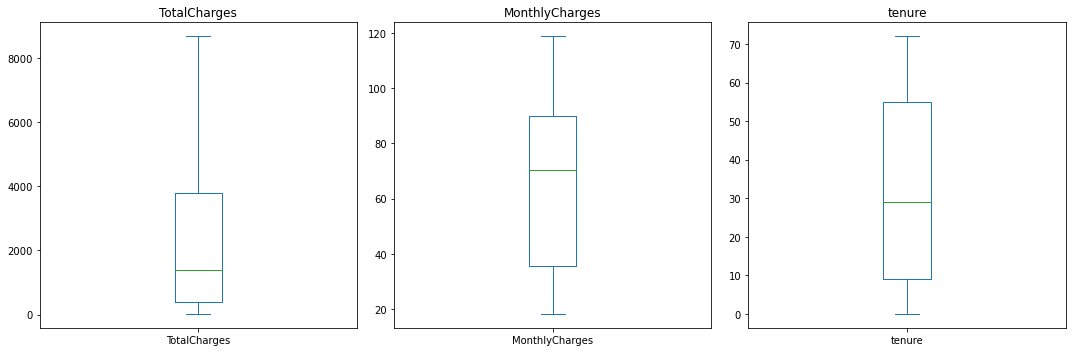

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

for i, column in enumerate(numerical_columns):
    data[column].plot(kind='box', ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

- TotalCharges: it indicates TotalCharges has a wide range of values with a high variability in the data.

- MonthlyCharges: it indicates MonthlyCharges also has a wide range of values but with less variability than TotalCharges.

- tenure: it indicates the range of values for tenure is relatively narrow with moderate variability in the data.

Add the rest of columns as categorical/discrete data(except the 'Churn') to a list:

In [8]:
# We could also use select_dtype for finding categorical columns, but it does not recoginze 'SeniorCitizen'
# and we can't add int64 to the list since 'tenure' is also int64 but a numerical feature(overhead).
# categorized_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorized_columns = ['PaymentMethod', 'PaperlessBilling', 'Contract', 'StreamingMovies', 'StreamingTV', 
        'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'InternetService', 'MultipleLines',
        'PhoneService', 'Dependents', 'Partner', 'SeniorCitizen', 'gender']

Understanding categories:

In [9]:
for column in categorized_columns:
    print(column, len(data[column].unique()))
    print(data[column].value_counts())
    print('-'*10)

PaymentMethod 4
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
----------
PaperlessBilling 2
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
----------
Contract 3
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
----------
StreamingMovies 3
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
----------
StreamingTV 3
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
----------
TechSupport 3
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
----------
DeviceProtection 3
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
----------
OnlineBack

Now, let us visualize them by looping through each categorical feature and plot the categories(double-click on the figure to see with a fine quality):

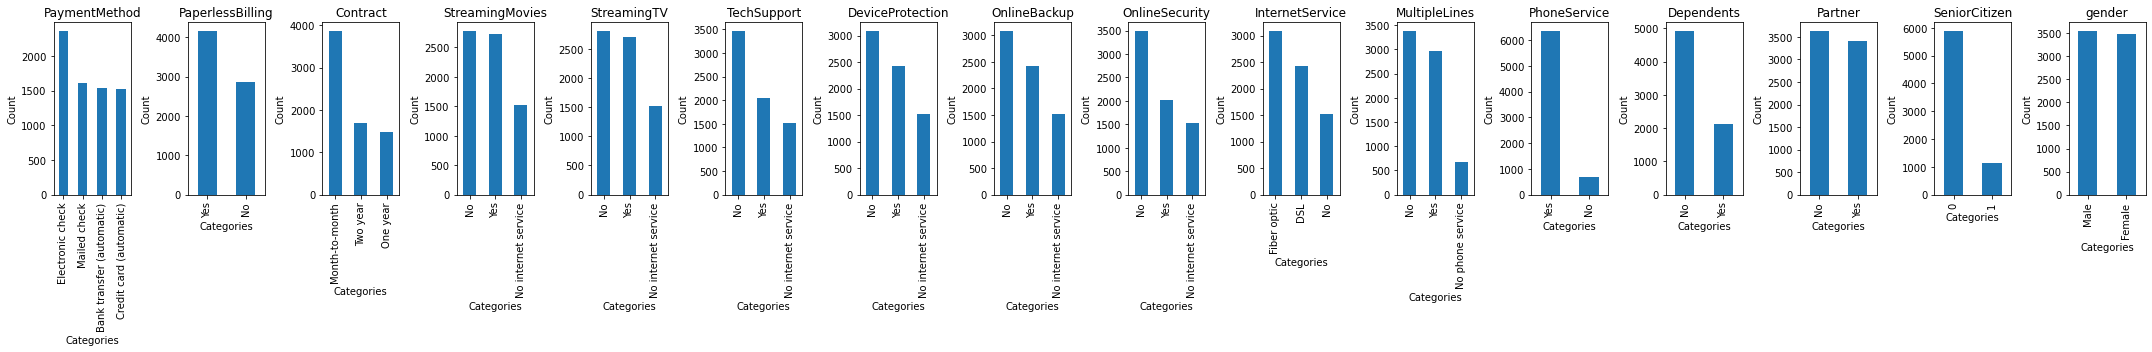

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=len(categorized_columns), figsize=(30, 5))
for i, column in enumerate(categorized_columns):
    data[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')
    
plt.tight_layout()
plt.show()

Convert categorical and discrete data to dummy variables. In this way, every class has its own column/feature:

In [11]:
data[target_column] = data[target_column].replace(['Yes', 'No'], [1.0, 0.0])
data_dummies = pandas.get_dummies(data)
data_dummies.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0.0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0.0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1.0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0.0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1.0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


We can also change data variable by labeling categorical data:

In [12]:
data_labeled = data.copy()
for column in categorized_columns:
    get_classes = data[column].unique()
    data_labeled[column] = data[column].replace(get_classes, list(range(len(get_classes))))
data_labeled.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0.0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0.0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1.0
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0.0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1.0


Integrating and rescaling data(it doesn't touch target_column):

In [13]:
data_dummies = util.minmax_rescaling(data_dummies.columns, data_dummies)
data_dummies.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Plot the correlation between features using a heatmap:

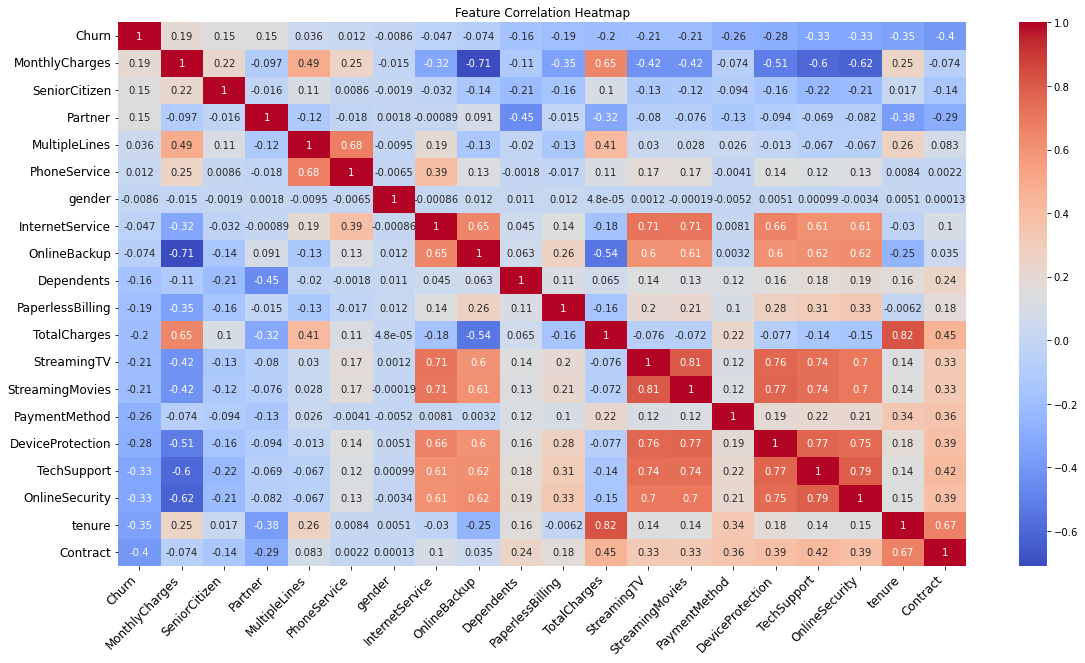

In [14]:
corr = data_labeled.corr()
corr_sorted = corr[target_column].sort_values(ascending=False)
corr_sorted = corr.loc[corr_sorted.index, corr_sorted.index]
fig, ax = plt.subplots(figsize=(19, 10))
sns.heatmap(corr_sorted, annot=True, cmap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
ax.set_title('Feature Correlation Heatmap')
plt.show()

It seems the 'contract' and 'tenure' features have a moderate negative correlation with Churn, which means as the contract goes up the probability of churn to be one decreases. On the other hand, the 'MonthlyCharges' has a positive correlation with Churn, which means as the MonthlyCharges goes up, the probability of churn to be zero decreases. The correlation heatmap could be a little overwhelming due to the number of features. So:

<AxesSubplot:>

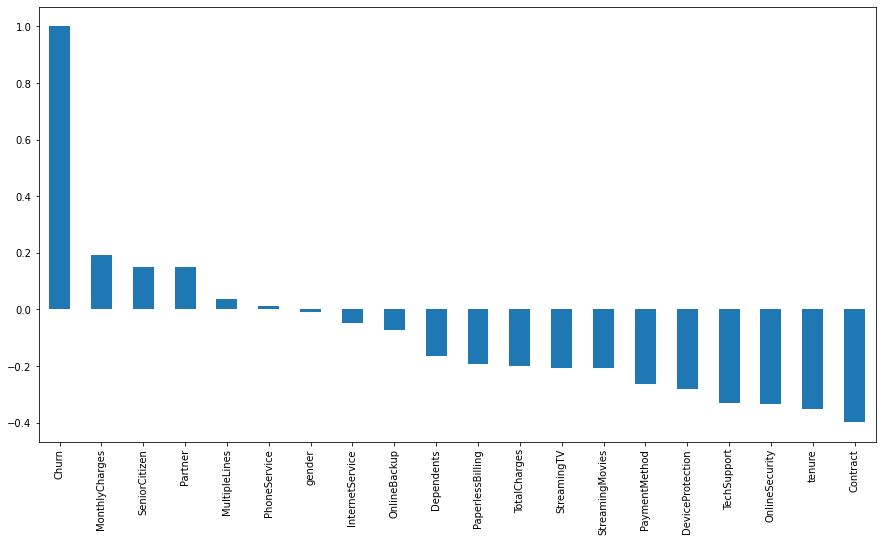

In [15]:
plt.figure(figsize=(15,8))
corr[target_column].sort_values(ascending = False).plot(kind='bar')

Using 'data_dummies' for correlation can help us understand features and the effectiveness of their categories better:

<AxesSubplot:>

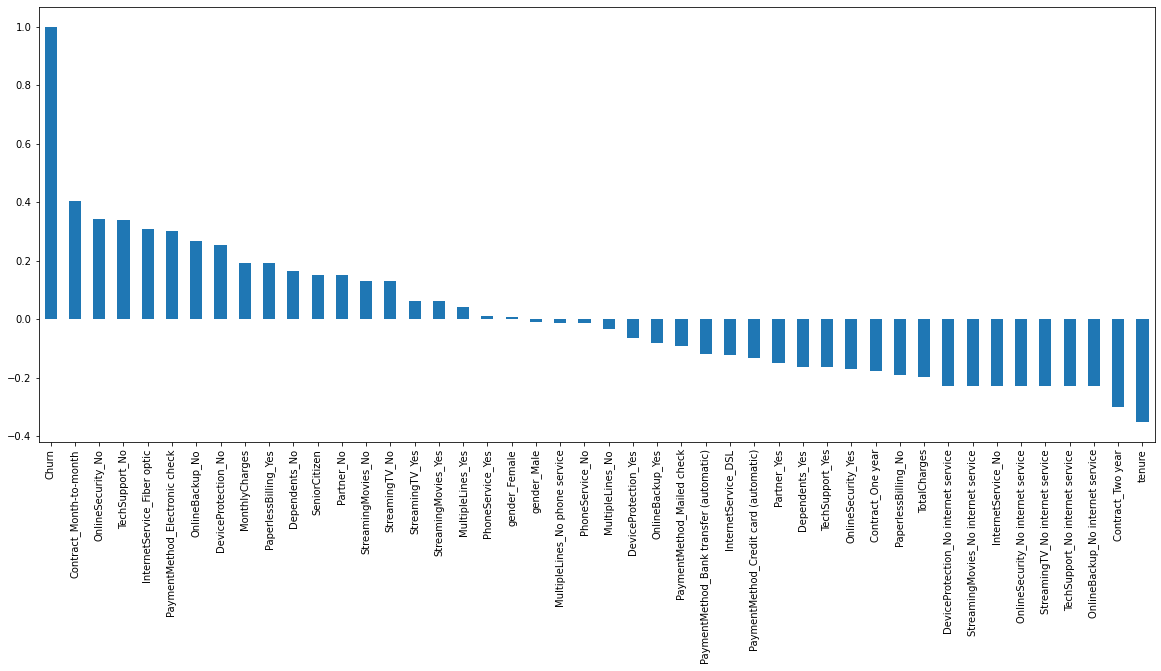

In [16]:
plt.figure(figsize=(20,8))
data_dummies.corr()[target_column].sort_values(ascending = False).plot(kind='bar')

Split data to train and test:

In [17]:
test_prob = 0.1
seed = 123
x = data_dummies.drop(target_column, axis=1)
y = data_dummies[target_column]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=test_prob, random_state=seed)

Logistic regression:

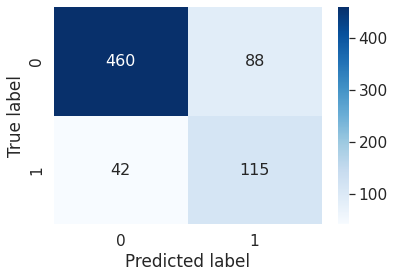

Accuracy: 0.8156028368794326
Precision: 0.8394160583941606
Recall: 0.9163346613545816
F1-score: 0.8761904761904761


In [18]:
model = LogisticRegression(max_iter=120)
result = model.fit(train_x, train_y)
pred_y = model.predict(test_x)
c_matrix, accuracy, precision, recall, f1_score = util.model_scoring(pred_y, test_y)
sns.set(font_scale=1.4)
sns.heatmap(c_matrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)

Extract essential features:

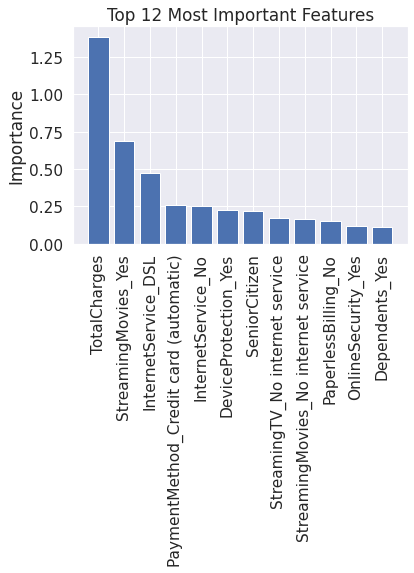

In [19]:
importances = model.coef_[0]
top_k=12

top_features = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)[:top_k]
plt.bar([data_dummies.columns.values[i] for i in top_features], [importances[i] for i in top_features])
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title(f'Top {top_k} Most Important Features')
plt.show()

Support vector machine:

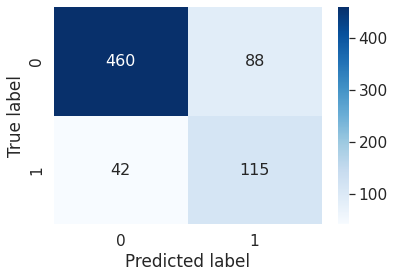

Accuracy: 0.8156028368794326
Precision: 0.8394160583941606
Recall: 0.9163346613545816
F1-score: 0.8761904761904761


In [20]:
svm = SVC(kernel='linear')
svm.fit(train_x, train_y)
pred_y = model.predict(test_x)
c_matrix, accuracy, precision, recall, f1_score = util.model_scoring(pred_y, test_y)
sns.set(font_scale=1.4)
sns.heatmap(c_matrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)

Extract essential features:

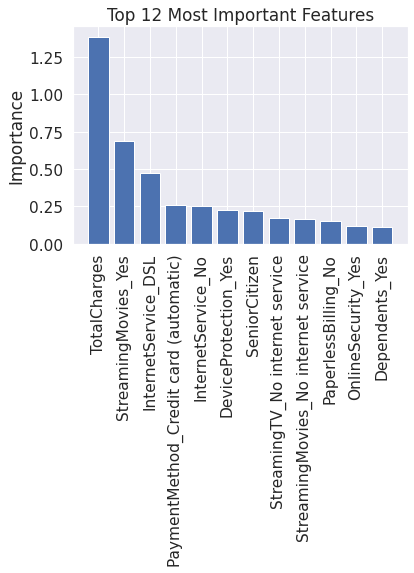

In [21]:
importances = model.coef_[0]
top_k = 12

top_features = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)[:top_k]
plt.bar([data_dummies.columns.values[i] for i in top_features], [importances[i] for i in top_features])
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title(f'Top {top_k} Most Important Features')
plt.show()

We can also try XGBoost, etc. the same way we did for SVM, and logistic regression.